## Z-Score Skew

In [1]:
# We shall be fixing skewness before handling outliers, mmm `kay
# Importing useful packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew
from sklearn import preprocessing

# Importing csv file
data = pd.read_csv("ReadyDF", index_col=0)
data.head(2)

,I1,I2,I3,P_IPO,P_H,P_L,P_1Day,C1,C2,C4,...,C5',C6',T3',T4',T5',S1',S2',S3',Y1,Y2
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.87,122.0,1.0,0.029074,...,3.864345,900.0,0.908876,0.640426,0.054250,0.004875,0.009199,0.010929,0,1
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.25,259.0,0.0,-0.013352,...,12.028832,0.0,0.898724,0.644753,0.051395,0.003258,0.011105,0.010876,1,0


In [2]:
# Creating a target variables
targets = data.iloc[:,:7]
print(targets.head(2))

targets2 = data.iloc[:,20:22]
print(targets2.head(2))

# Concatinating targets variables together for future use/csv file
Targets = pd.concat([targets,targets2], axis=1, join_axes=[data.index])

# Dropping columns that are now housed in other variables
data = data.drop(['I1','I2','I3','P_IPO','P_H','P_L','P_1Day','Y1','Y2'], axis=1)
data.head(2)

     I1                                  I2    I3  P_IPO   P_H  P_L  P_1Day
0  AATI  ADVANCED ANALOGIC TECHNOLOGIES INC  3674   10.0   9.5  8.5   11.87
1  ABPI     ACCENTIA BIOPHARMACEUTICALS INC  2834    8.0  10.0  8.0    7.25
   Y1  Y2
0   0   1
1   1   0


,C1,C2,C4,C7,C3',C5',C6',T3',T4',T5',S1',S2',S3'
0,122.0,1.0,0.029074,51.345,1,3.864345,900.0,0.908876,0.640426,0.054250,0.004875,0.009199,0.010929
1,259.0,0.0,-0.013352,25.936,0,12.028832,0.0,0.898724,0.644753,0.051395,0.003258,0.011105,0.010876


In [3]:
# Checking skew before handling skew
data.skew()

C1      5.747573
C2     -2.123926
C4     -0.491134
C7     12.348960
C3'    -0.117764
C5'    10.648354
C6'     1.149979
T3'    25.575106
T4'     0.080198
T5'    26.111496
S1'    20.996966
S2'    10.311527
S3'    22.205490
dtype: float64

In [4]:
## THIS FUNCTION IS FROM DANIELLE ENZZO THE PRIOR YEAR ##
### This function defines the log transformation using (x+1)
def log_transform(feature):
    data[feature] = np.log1p(data[feature].values)

#### We are leaving out features C2 and C3' because they are boolean values    
    
log_transform("C1")
log_transform("C7")
log_transform("C5'")
log_transform("C6'")
data["T3'"] = np.cbrt(data["T3'"])
data["T5'"] = np.log10(data["T5'"])
data["S1'"] = np.log10(data["S1'"])
data["S2'"] = np.log10(data["S2'"])
data["S3'"] = np.log10(data["S3'"])

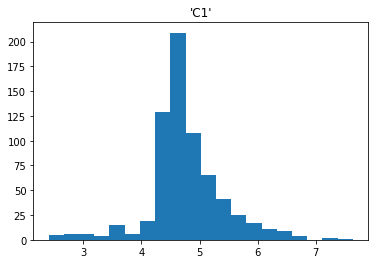

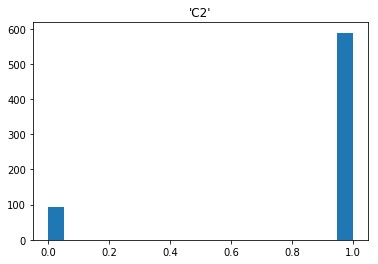

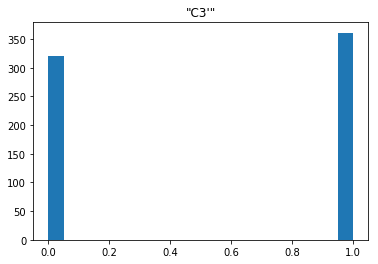

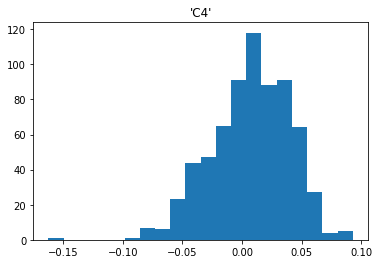

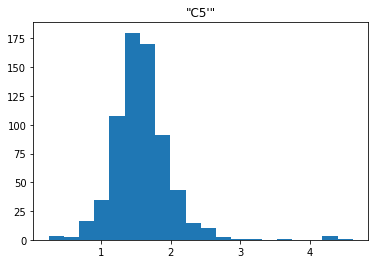

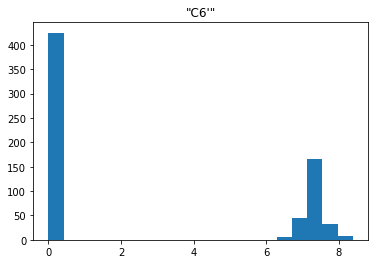

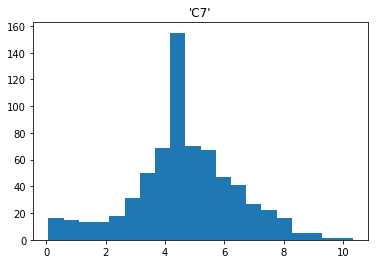

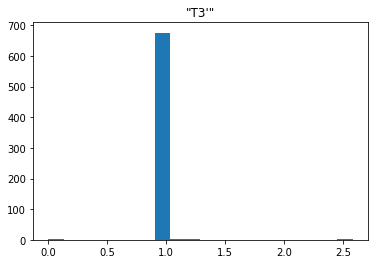

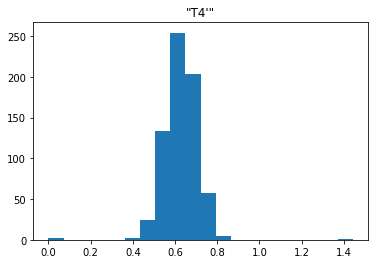

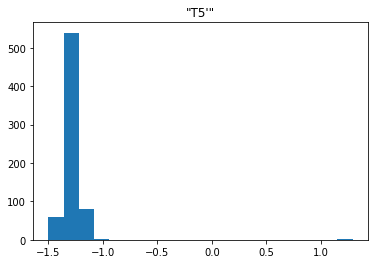

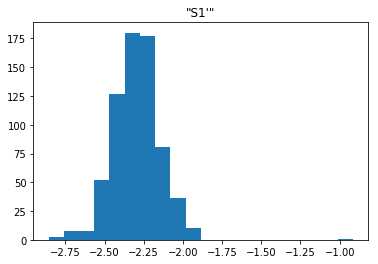

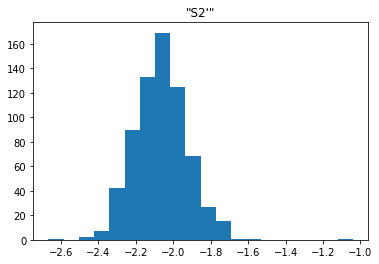

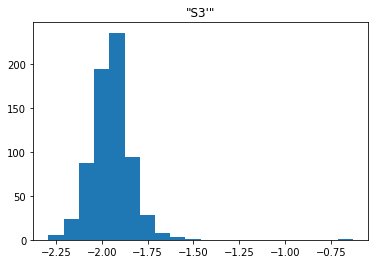

In [5]:
# Creating a 'for loop' to display each of the columns in a histogram
# would be the most efficient way to display the distribution of the features

## Creating a new variable `new_cols` to store all the features we would like
## to display with histograms
new_cols = ['C1','C2',"C3'",'C4',"C5'","C6'",'C7',"T3'","T4'","T5'","S1'","S2'","S3'"]

## Creating a new variable `plot_hists` to store the `new_cols`
## and be populated with data from the `df_data` dataframe
plot_hists = data[new_cols]

### Creating a for loop that will plot each column in
### the variable `plot_hists` as long as it is a column
### Using 20 `bins` for each histogram, as well
for i in range(len(plot_hists.columns)):
    plt.hist(plot_hists.iloc[:,i].dropna(),bins=20)
### For each title, we are using the name of the column
### as it appears in the `plot_hists` variable    
    plt.title('%a' % plot_hists.columns[i])
### Ultimately showing the histogram at the end of 
### the for loop
    plt.show()

In [6]:
# Checking after to see if the function worked for the skew
data.skew()

C1      0.202995
C2     -2.123926
C4     -0.491134
C7     -0.182544
C3'    -0.117764
C5'     1.910268
C6'     0.517544
T3'     3.183775
T4'     0.080198
T5'    16.375232
S1'     0.928130
S2'     0.586934
S3'     2.333006
dtype: float64

In [6]:
## We are having issues with feature T5'

## Saving df to csv file
data.to_csv("ReadyDF_SKEW", ",")

## Saving Targets
Targets.to_csv("ReadyDF_TARGETS", ",")